In [38]:
import numpy as np 
import pandas as pd
import datetime # para convertir a dia de la semana
import calendar # idem

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# https://github.com/idontdomath/datos-exploratory-data-analysis/blob/master/class01/03-intro-pandas-flight-delays.ipynb

In [39]:
# estatus = pd.read_csv('status.csv', sep='\t', iterator=True, chunksize=1000)
#cada vez que se corre son los proximos 500
# estatus.get_chunk(500)

In [40]:
trips = pd.read_csv('trip.csv', low_memory=False)
#Se convierte los dates a datetime64[ns].
trips['start_date'] = pd.to_datetime(trips['start_date'])
trips['end_date'] = pd.to_datetime(trips['end_date'])

In [41]:
#Se agrega una nueva columna date que coincide con weather.
trips['date'] = trips['start_date'].apply(lambda x: x.date())
#Se convierte date a datetime64[ns].
trips['date'] = pd.to_datetime(trips['date'])

In [42]:
# chequeo tipos
trips.dtypes

id                             int64
duration                       int64
start_date            datetime64[ns]
start_station_name            object
start_station_id               int64
end_date              datetime64[ns]
end_station_name              object
end_station_id                 int64
bike_id                        int64
subscription_type             object
zip_code                      object
date                  datetime64[ns]
dtype: object

In [43]:
# ejemplo del uso de datetime con día actual
dia_actual = datetime.datetime.today()
dia_actual

datetime.datetime(2017, 4, 9, 1, 25, 29, 490887)

In [44]:
# lo paso a dia de la semana
dia_actual.weekday()

6

In [45]:
# mejor en palabras que en números
calendar.day_name[dia_actual.weekday()]

'Sunday'

In [46]:
# función para convertir fecha a día de la semana.
def fecha_a_dia(fecha):
    return calendar.day_name[fecha.weekday()]

In [47]:
#Se crean columnas con los dias de la semana.
trips['start_day_of_week'] = trips['start_date'].map(fecha_a_dia)
trips['end_day_of_week'] = trips['end_date'].map(fecha_a_dia)

In [48]:
trips['horario_inicial'] = trips['start_date'].dt.time
trips['horario_inicial_float'] = trips['start_date'].dt.hour + trips['start_date'].dt.minute / 100
#por el momento dejo ambos por si se necesitan

In [49]:
trips['horario_final'] = trips['end_date'].dt.time
trips['horario_final_float'] = trips['end_date'].dt.hour + trips['end_date'].dt.minute / 100
#idem

In [50]:
trips['duracion_viaje'] = trips['end_date'] - trips['start_date']
# trips['duracion_viaje'] = pd.to_datetime(trips['duracion_viaje'])
# no es necesario pero lo dejo por las dudas, puede servir

In [51]:
# vista final de cómo quedó el dataframe
trips

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,date,start_day_of_week,end_day_of_week,horario_inicial,horario_inicial_float,horario_final,horario_final_float,duracion_viaje
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127,2013-08-29,Thursday,Thursday,14:13:00,14.13,14:14:00,14.14,00:01:00
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138,2013-08-29,Thursday,Thursday,14:42:00,14.42,14:43:00,14.43,00:01:00
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214,2013-08-29,Thursday,Thursday,10:16:00,10.16,10:17:00,10.17,00:01:00
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060,2013-08-29,Thursday,Thursday,11:29:00,11.29,11:30:00,11.30,00:01:00
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103,2013-08-29,Thursday,Thursday,12:02:00,12.02,12:04:00,12.04,00:02:00
5,4927,103,2013-08-29 18:54:00,Golden Gate at Polk,59,2013-08-29 18:56:00,Golden Gate at Polk,59,527,Subscriber,94109,2013-08-29,Thursday,Thursday,18:54:00,18.54,18:56:00,18.56,00:02:00
6,4500,109,2013-08-29 13:25:00,Santa Clara at Almaden,4,2013-08-29 13:27:00,Adobe on Almaden,5,679,Subscriber,95112,2013-08-29,Thursday,Thursday,13:25:00,13.25,13:27:00,13.27,00:02:00
7,4563,111,2013-08-29 14:02:00,San Salvador at 1st,8,2013-08-29 14:04:00,San Salvador at 1st,8,687,Subscriber,95112,2013-08-29,Thursday,Thursday,14:02:00,14.02,14:04:00,14.04,00:02:00
8,4760,113,2013-08-29 17:01:00,South Van Ness at Market,66,2013-08-29 17:03:00,South Van Ness at Market,66,553,Subscriber,94103,2013-08-29,Thursday,Thursday,17:01:00,17.01,17:03:00,17.03,00:02:00
9,4258,114,2013-08-29 11:33:00,San Jose City Hall,10,2013-08-29 11:35:00,MLK Library,11,107,Subscriber,95060,2013-08-29,Thursday,Thursday,11:33:00,11.33,11:35:00,11.35,00:02:00


In [52]:
trips.id.count()

669959

In [53]:
# una primera impresión es que hay viajes "basura" que duran menos de 3 minutos y que las estaciones de inicio y fin
# son las mismas, esto dice que el usuario no tomó el viaje por algún motivo
# se van a filtrar esos viajes
trips = trips[-((trips['duracion_viaje'] <= '00:03:00') & (trips['start_station_id'] == trips['end_station_id']))]

In [54]:
# no es necesario pero lo dejo por las dudas, puede servir
# trips[-((trips['duracion_viaje'] < '1970-01-01 00:10:00') & (trips['start_station_id'] == trips['end_station_id']))]

In [55]:
# ahora los datos quedan más limpios
trips

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,date,start_day_of_week,end_day_of_week,horario_inicial,horario_inicial_float,horario_final,horario_final_float,duracion_viaje
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103,2013-08-29,Thursday,Thursday,12:02:00,12.02,12:04:00,12.04,00:02:00
6,4500,109,2013-08-29 13:25:00,Santa Clara at Almaden,4,2013-08-29 13:27:00,Adobe on Almaden,5,679,Subscriber,95112,2013-08-29,Thursday,Thursday,13:25:00,13.25,13:27:00,13.27,00:02:00
9,4258,114,2013-08-29 11:33:00,San Jose City Hall,10,2013-08-29 11:35:00,MLK Library,11,107,Subscriber,95060,2013-08-29,Thursday,Thursday,11:33:00,11.33,11:35:00,11.35,00:02:00
10,4549,125,2013-08-29 13:52:00,Spear at Folsom,49,2013-08-29 13:55:00,Embarcadero at Bryant,54,368,Subscriber,94109,2013-08-29,Thursday,Thursday,13:52:00,13.52,13:55:00,13.55,00:03:00
11,4498,126,2013-08-29 13:23:00,San Pedro Square,6,2013-08-29 13:25:00,Santa Clara at Almaden,4,26,Subscriber,95112,2013-08-29,Thursday,Thursday,13:23:00,13.23,13:25:00,13.25,00:02:00
14,4386,134,2013-08-29 12:31:00,Clay at Battery,41,2013-08-29 12:33:00,Beale at Market,56,503,Subscriber,94109,2013-08-29,Thursday,Thursday,12:31:00,12.31,12:33:00,12.33,00:02:00
18,5097,142,2013-08-29 22:21:00,Steuart at Market,74,2013-08-29 22:24:00,Harry Bridges Plaza (Ferry Building),50,564,Subscriber,94115,2013-08-29,Thursday,Thursday,22:21:00,22.21,22:24:00,22.24,00:03:00
19,5084,144,2013-08-29 22:06:00,Powell Street BART,39,2013-08-29 22:08:00,Market at 4th,76,574,Subscriber,94115,2013-08-29,Thursday,Thursday,22:06:00,22.06,22:08:00,22.08,00:02:00
20,4982,146,2013-08-29 19:42:00,Spear at Folsom,49,2013-08-29 19:44:00,Embarcadero at Bryant,54,542,Subscriber,94105,2013-08-29,Thursday,Thursday,19:42:00,19.42,19:44:00,19.44,00:02:00
23,5093,160,2013-08-29 22:12:00,Post at Kearney,47,2013-08-29 22:14:00,Market at Sansome,77,442,Subscriber,94115,2013-08-29,Thursday,Thursday,22:12:00,22.12,22:14:00,22.14,00:02:00


In [56]:
trips.id.count()
# se filtraron unos 3000 viajes aprox (podria servir para una conclusion de cuantas bicicletas en promedio
# estan descompuestas probablemente??)

667358

# 1) Análisis de viajes según día y horario

En estos primeros plots se analizará la relación general entre los viajes y el día/horario de la semana.

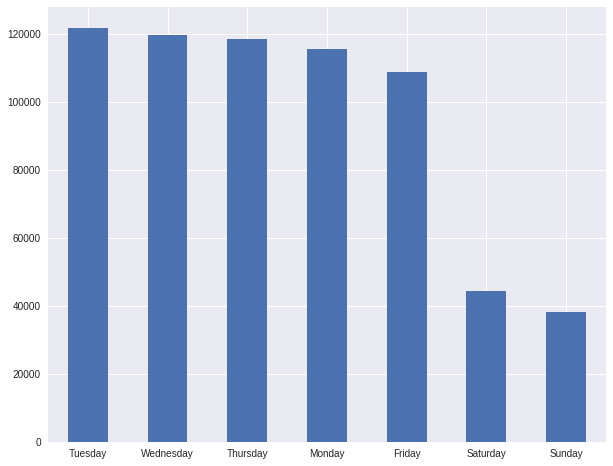

In [57]:
trips['start_day_of_week'].value_counts().plot(kind='bar', rot=0, figsize=(10,8));

Se ve que hay una diferencia drástica en el uso del servicio entre la semana y el fin de semana.

#### Picos de horarios de uso:

In [78]:
semana_entera = trips[['start_day_of_week','horario_inicial_float', 'start_station_name', 'end_station_name']].round()
semana_entera

,start_day_of_week,horario_inicial_float,start_station_name,end_station_name
4,Thursday,12.0,South Van Ness at Market,Market at 10th
6,Thursday,13.0,Santa Clara at Almaden,Adobe on Almaden
9,Thursday,11.0,San Jose City Hall,MLK Library
10,Thursday,14.0,Spear at Folsom,Embarcadero at Bryant
11,Thursday,13.0,San Pedro Square,Santa Clara at Almaden
14,Thursday,12.0,Clay at Battery,Beale at Market
18,Thursday,22.0,Steuart at Market,Harry Bridges Plaza (Ferry Building)
19,Thursday,22.0,Powell Street BART,Market at 4th
20,Thursday,19.0,Spear at Folsom,Embarcadero at Bryant
23,Thursday,22.0,Post at Kearney,Market at Sansome


In [81]:
semana = semana_entera[-(semana_entera['start_day_of_week'] == "Saturday")]
semana = semana_entera[-(semana_entera['start_day_of_week'] == "Sunday")]

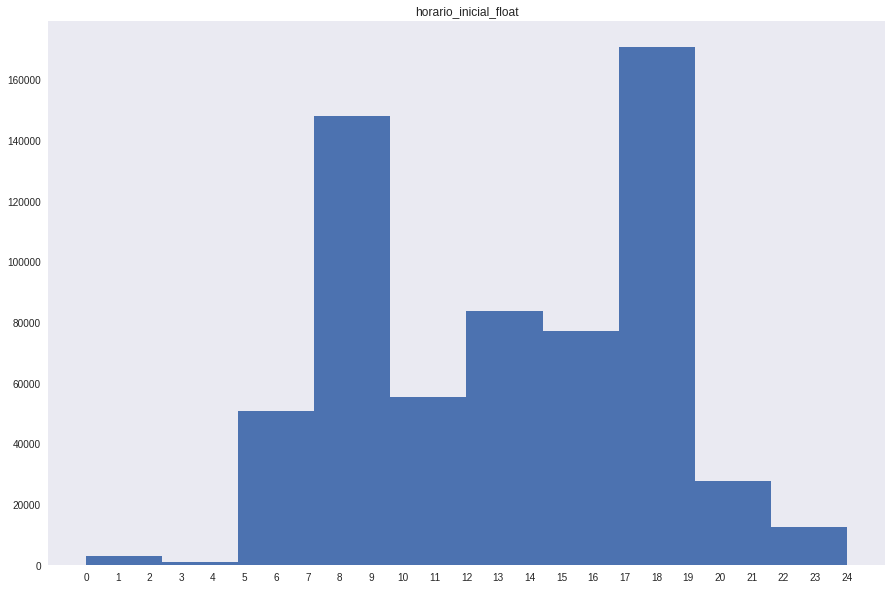

In [82]:
semana.hist(column='horario_inicial_float', grid=False, figsize=(15,10), xrot=0);
plt.xticks(range(0,25,1));

Se aprecia que durante la semana los horarios pico son de 7 a 9 y de 17 a 19, particularmente cuando la gente va y cuando regresa al trabajo, escuela, etc.

In [83]:
finde = semana_entera[(semana_entera['start_day_of_week'] == "Saturday") | (semana_entera['start_day_of_week'] == "Sunday")]

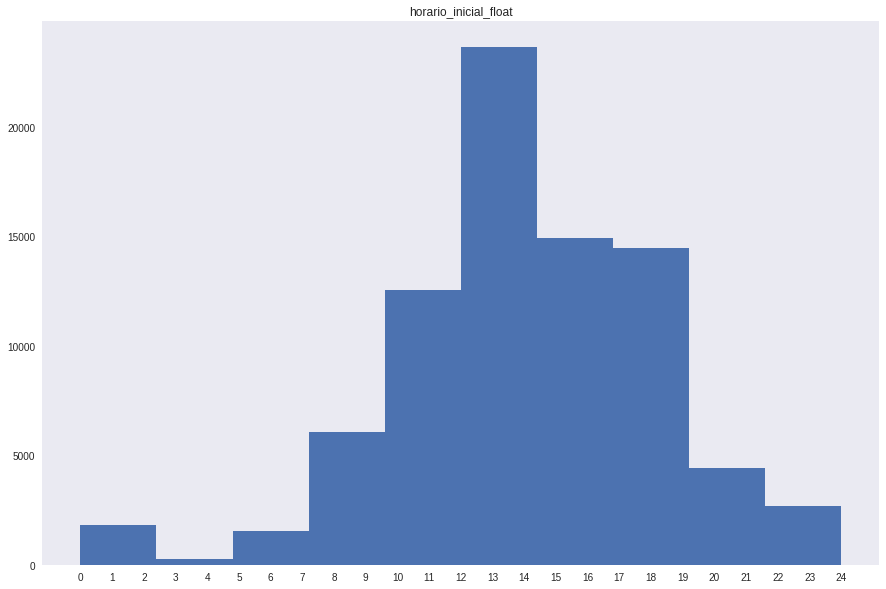

In [84]:
finde.hist(column='horario_inicial_float', grid=False, figsize=(15,10), xrot=0);
plt.xticks(range(0,25,1));

Los horarios pico los fines de semana son de 12 a 14. También lo que se observa es el poco uso del servicio durante la noche (de 22 a 24). Esto refleja que la bicicleta no está entre los transportes más usados para moverse cuando la gente desea salir por la noche.

### A) Análisis de los horarios importantes

In [ ]:
# destino y viaje mas popular en hora pico
# destino y viaje mas popular viernes y sabado por la noche

In [85]:
viajes_en_hora_pico_semana = semana[((semana['horario_inicial_float'] >= 7) & (semana['horario_inicial_float'] <= 9)) 
                                   | ((semana['horario_inicial_float'] >= 17) & (semana['horario_inicial_float'] <= 19))]

In [116]:
destinos_mas_populares_hora_pico_semana = viajes_en_hora_pico_semana['end_station_name'].value_counts().sort_values(ascending=False)
destinos_mas_populares_hora_pico_semana = destinos_mas_populares_hora_pico_semana.head(10)
destinos_mas_populares_hora_pico_semana

San Francisco Caltrain (Townsend at 4th)         37658
San Francisco Caltrain 2 (330 Townsend)          22054
2nd at Townsend                                  16901
Townsend at 7th                                  15855
Market at Sansome                                15163
Steuart at Market                                14713
Harry Bridges Plaza (Ferry Building)             14568
Temporary Transbay Terminal (Howard at Beale)    14545
Embarcadero at Sansome                           12731
Powell Street BART                                9139
Name: end_station_name, dtype: int64

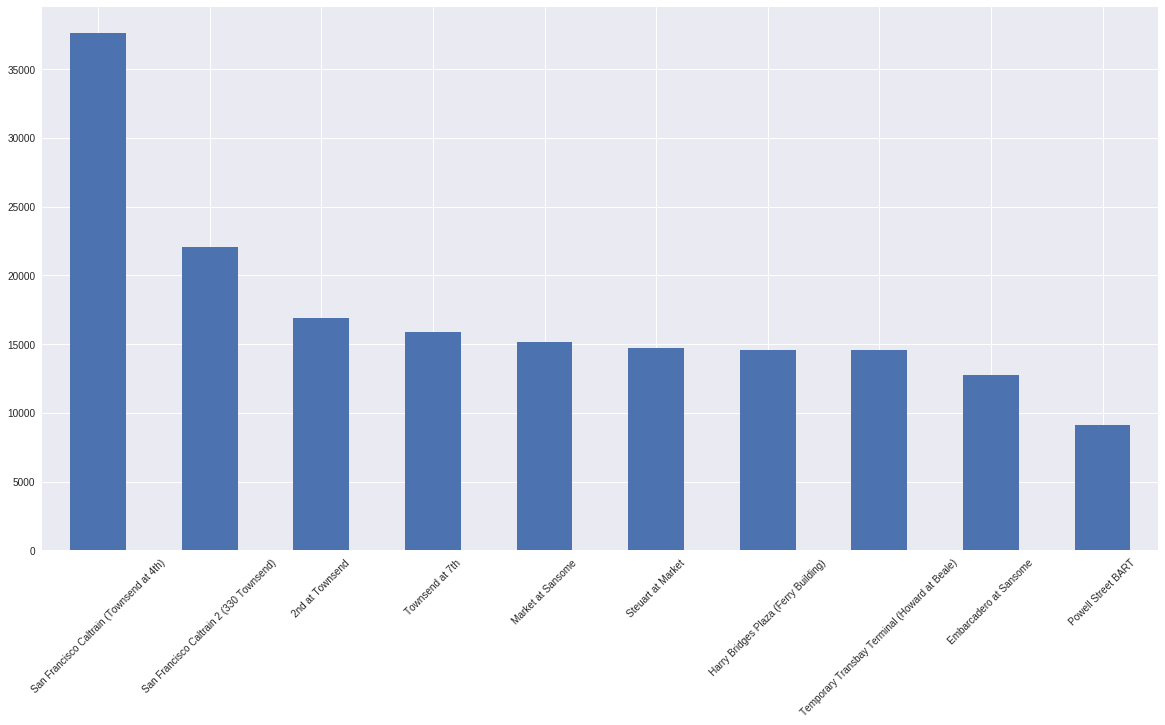

In [123]:
destinos_mas_populares_hora_pico_semana.plot(kind='bar', rot=45, figsize=(20,10));

Estos son los 10 destinos más populares durante las horas pico en la semana. 
// falta buscar info de san francisco para ver la importancia de estos lugares a niveles laborales/educativos para hacer una conclusión

In [166]:
# función que dado un dataframe con un campo 'start_station_name' y otro 'end_station_name',
# devuelve un diccionario con los start_station como clave y como valor un diccionario con clave el end_station
# y valor la cantidad de viajes de ese trayecto. También devuelve una lista con el trayecto con mayor cantidad
# de viajes junto con el start y end station del mismo. Orden = O(n) siendo n la cantidad de rows del dataframe.
def contador_viajes(dataframe):
    cont_viajes = {}
    viaje_mas_popular = []
    viaje_mas_popular.append(0)
    viaje_mas_popular.append("")
    viaje_mas_popular.append("")
    for index,row in dataframe.iterrows():
        
        if row['start_station_name'] not in cont_viajes:
            cont_viajes[row['start_station_name']] = {}
           
        if row['end_station_name'] not in cont_viajes[row['start_station_name']]:
            cont_viajes[row['start_station_name']][row['end_station_name']] = 1
        else:
            cont_viajes[row['start_station_name']][row['end_station_name']] += 1
        
        if cont_viajes[row['start_station_name']][row['end_station_name']] > viaje_mas_popular[0]:
            viaje_mas_popular[0] = cont_viajes[row['start_station_name']][row['end_station_name']]
            viaje_mas_popular[1] = row['start_station_name']
            viaje_mas_popular[2] = row['end_station_name']
    
    return cont_viajes,viaje_mas_popular

In [167]:
contador_de_viajes_hora_pico_semana,viaje_mas_popular_hora_pico_semana = contador_viajes(viajes_en_hora_pico_semana)
viaje_mas_popular_hora_pico_semana

[3709, 'San Francisco Caltrain 2 (330 Townsend)', 'Townsend at 7th']

In [168]:
contador_de_viajes_hora_pico_semana

{'2nd at Folsom': {'2nd at Folsom': 26,
  '2nd at South Park': 203,
  '2nd at Townsend': 332,
  '5th at Howard': 152,
  'Beale at Market': 114,
  'Broadway St at Battery St': 46,
  'Civic Center BART (7th at Market)': 107,
  'Clay at Battery': 369,
  'Commercial at Montgomery': 106,
  'Davis at Jackson': 63,
  'Embarcadero at Bryant': 105,
  'Embarcadero at Folsom': 140,
  'Embarcadero at Sansome': 68,
  'Embarcadero at Vallejo': 31,
  'Golden Gate at Polk': 21,
  'Grant Avenue at Columbus Avenue': 125,
  'Harry Bridges Plaza (Ferry Building)': 517,
  'Howard at 2nd': 171,
  'Market at 10th': 150,
  'Market at 4th': 179,
  'Market at Sansome': 1275,
  'Mechanics Plaza (Market at Battery)': 55,
  'Post at Kearney': 33,
  'Post at Kearny': 53,
  'Powell Street BART': 237,
  'Powell at Post (Union Square)': 72,
  'San Francisco Caltrain (Townsend at 4th)': 1361,
  'San Francisco Caltrain 2 (330 Townsend)': 558,
  'San Francisco City Hall': 11,
  'South Van Ness at Market': 30,
  'Spear at

Con esto se ve que el viaje más realizado en hora pico durante la semana es el trayecto San Francisco Caltrain 2 (330 Townsend) - Townsend at 7th. // idem lo de arriba acerca de la investigación (no habrá otro transporte para realizar este trayecto? conviene mucho por algun motivo?)

In [ ]:
# relacionado a las duraciones: 
# promedio, mas larga (desarrollar con esto), mas corta
# viajes mas largos en la semana o el finde? dia con mas trayectos mas largos idem con mas cortos
# trayecto de mucha duración más popular, idem poca duración (probablemente sea imposible usar otro medio p eso?)
# promedio duraciones de viajes en las horas pico y viernes y sabado por la noche
# comparacion de duracion viajes de dia con viajes de noche

In [ ]:
# estadisticas meses: 
# orden de cantidad de viajes mayor a menor
# como afecta que sean vacaciones (cualquier tipo de vacaciones) (comparar con cantidad de viajes 
# y con lo que ya hice de dias con mas viajes y horas pico)
# comparacion viajes entre estaciones climaticas
# como afecta que sea feriado en comparacion a un dia promedio

# estadisticas años:
# año con mas viajes (crece ascendentemente el servicio?)
# investigar algun hecho importante que hubo en esos años en san francisco para mostrar como afecto (comparar año 
# con año para mostrar la diferencia)